In [1]:
from camminapy import * 
from scipy.integrate import quad


Bad key "text.kerning_factor" on line 4 in
/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


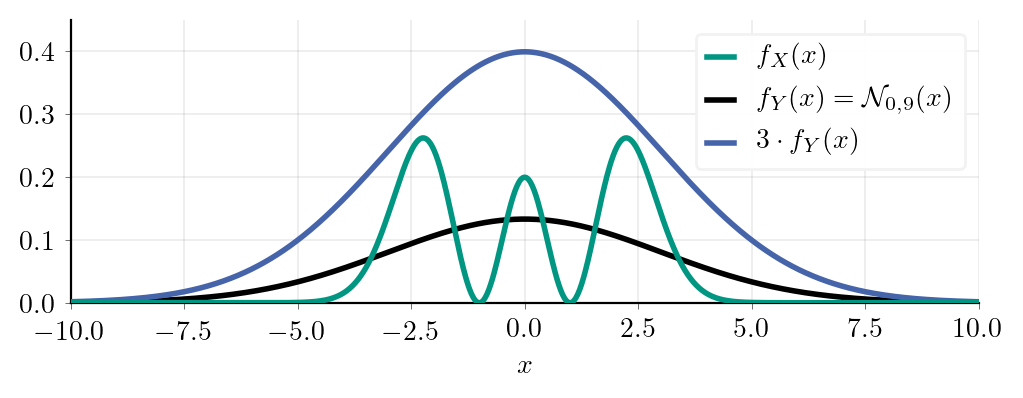

In [2]:
plt.style.use("kitish")
fig, ax = plt.subplots(1,1)

def serialf1(x,mu=0,sigma=3):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
f1 = np.vectorize(serialf1)

def serialf2tilde(x,mu=0,sigma=1):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)*(x-1)**2*(x+1)**2
c,_ = quad(serialf2tilde,-100,100)
f2 = np.vectorize(serialf2tilde)


x = np.linspace(-10,10,1000)

ax.plot(x,f2(x)/c,label=r'$f_X(x)$',zorder = 20)
ax.plot(x,f1(x),label=r'$f_Y(x)= \mathcal{N}_{0,9}(x)$')
ax.plot(x,3*f1(x),label=r'$3\cdot f_Y(x)$',zorder=18)#$4\cdot \mathcal{N}_{0,1}(x)$')

ax.set_title("")
ax.set_xlabel(r"$x$")
#ax.set_ylabel(r"$y$")
ax.set_ylim([0,0.45])
ax.legend()
plt.savefig("rejection_sampling.pdf")

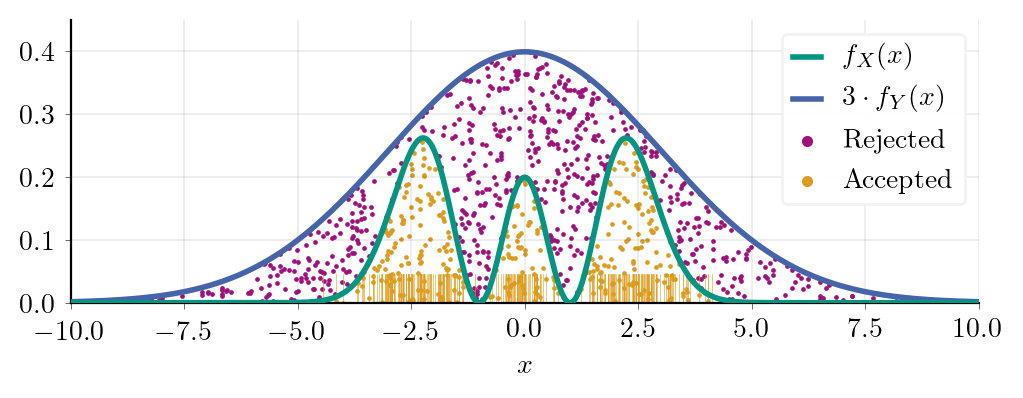

In [4]:
plt.style.use("kitish")
fig, ax = plt.subplots(1,1)

def serialf1(x,mu=0,sigma=3):
    return np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
f1 = np.vectorize(serialf1)

def serialf2tilde(x,mu=0,sigma=1):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)*(x-1)**2*(x+1)**2
c,_ = quad(serialf2tilde,-100,100)
f2 = np.vectorize(serialf2tilde)


M = 3
x = np.linspace(-10,10,1000)

ax.plot(x,f2(x)/c,label=r'$f_X(x)$',zorder = 20,color = kit.green)
#ax.plot(x,f1(x),label=r'$\mathcal{N}_{0,16}(x)$')
ax.plot(x,M*f1(x),label=r'$3 \cdot f_Y(x)$',zorder=18,color = kit.blue)#$4\cdot \mathcal{N}_{0,1}(x)$')


yeslabel = False
nolabel = False
count1 = 0
count2 = 0
for k in range(1000):
    xx = np.random.randn()*3 # sigma = 4
    uu = np.random.rand()*M
    uu = uu *f1(xx)
    if uu<f2(xx)/c:
        count1 +=1
        
        if not(yeslabel):
            ax.scatter(-11,uu,color = kit.orange,s=9,label = "Accepted")
            ax.axvline(xx,-0.1,0.1,color = kit.orange,lw=0.2)
            yeslabel = True
        else:
            ax.scatter(xx,uu,color = kit.orange,s=0.5,zorder=0)
            ax.axvline(xx,-0.1,0.1,color = kit.orange,lw=0.2)#,label = "Rejected sample")

    else:
        count2 += 1
        if not (nolabel):
            ax.scatter(-11,uu,color = kit.purple,s = 9,label="Rejected")
            nolabel = True
        else:
            ax.scatter(xx,uu,color = kit.purple,s = 0.5,zorder=0)

            
ax.set_title("")
ax.set_xlabel(r"$x$")
#ax.set_ylabel(r"$y$")
ax.set_xlim([-10,10])
ax.set_ylim([0.0,0.45])
ax.legend(loc = "upper right")
plt.savefig("rejection_sampling2.pdf")

In [21]:
count1


343

In [14]:
from sympy import *

x, y, z = symbols('x y z')

init_printing(use_unicode=True)

M = 4
sigma = 4
expr1 = M*exp(-x**2/sigma**2/2)/sigma
expr2 =   exp(-x**2/2)*(x-1)**2*(x+1)**2 / (2*sqrt(2*pi))

In [37]:
expr3 = expr1/expr2
expr4 = simplify(diff(expr3,x))

In [38]:
roots = solve(expr4,x)

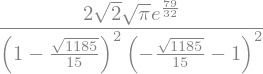

In [40]:
expr3.subs(x,roots[1])